This part creats random data and plot a polynomial with degree 3

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = pd.read_csv("test2.csv")
y = y.values
# np.random.seed(0)
# x = 2 - 3 * np.random.normal(0, 1, 100)
# y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + 1
# np.random.normal(-3, 3, 100)
# y = x[np.arange(0, x.shape[0], 2), :]
# x = x[np.arange(1, x.shape[0], 2), :]

# print(y.shape[0])
x = np.arange(0,9.9, 0.1)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

plt.scatter(x, y, s=10)
plt.show()

<Figure size 640x480 with 1 Axes>

MSE calculates MSE for each individual

In [2]:
def MSE(model, x, y):
    y_i = model.a[0] + model.a[1]*x + model.a[2]*(x**2) + model.a[3]*(x**3)
    n = x.shape[0]
    return (1/n)*np.sum((y_i - y)**2)
    

Individual

In [3]:
class Model:
    def __init__(self, a):
        self.a = a
        self.fitness = 0
    
    def calculateFitness(self, x, y):
        self.fitness = 1/(1+MSE(self, x, y))
    
        
    

In [4]:
def CreatePopulation(population_size, x, y):
    model = []
    for i in range(population_size):
        a = np.random.randn(4)*2
        m = Model(a)
        m.calculateFitness(x, y)
        model.append(m)
    return model

In [5]:
def  tornumentSelection(population, k, population_size):
    new_population = []
    for i in range(population_size):
        tornument = []
        for j in range(k):
            index = np.random.randint(population_size)
            tornument.append(population[index])
        best = tornument[0]
        for m in tornument:
            if best.fitness < m.fitness:
                best = m
        new_population.append(best)
    return new_population
    

In [6]:
def cross_over(population, population_size, x, y):
    for i in range(population_size):
        for j in range(i + 1, population_size):
            parent1 = population[i]
            parent2 = population[j]
            b = parent1.a.copy()
            b[::2] = parent2.a[::2]            
            m = Model(b)
            m.calculateFitness(x, y)
            population.append(m)
            
    return population
            

In [7]:
def mutation(population, prob, sigma):
    for chrom in population:
        for i in range(len(chrom.a)):
            r = np.random.random()
            if(r < prob): 
                chrom.a[i] += np.random.normal(0, sigma)
                chrom.calculateFitness(x, y)

In [8]:
def returning(population, population_size):
    new_population = []
    for j in range(population_size):
        for i in range(len(population)):
            best = population[0]
            if(best.fitness < population[i].fitness):
                best = population[i]
        new_population.append(best)
    return new_population

In [9]:
def GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y):
    population = CreatePopulation(populationSize, x, y)
    for i in range(numberOfGenerations):
        print(i)
        population = tornumentSelection(population, tornumentSize, populationSize)
        population = cross_over(population, populationSize, x, y)
        mutation(population, mutationRate, sigma)
        population = returning(population, populationSize)
        bestChild = getBest(population)
        print(bestChild.fitness)
    return bestChild

Get best individual from population after running the algorithm

In [10]:
def getBest(population):
    best = population[0]
    for child in population:
        if(best.fitness < child.fitness):
            best = child
    return best

In [11]:
def draw(x, y, model):
    # transforming the data to include another axis
#     x = x[:, np.newaxis]
#     y = y[:, np.newaxis]
    y_pred = model.a[0] + model.a[1]*x + model.a[2]*(x**2) + model.a[3]*(x**3)
#     y_pred.reshape([100])
#     print(y_pred)
    temp = np.ndarray.tolist(x.reshape(99))
    temp_y = np.ndarray.tolist(y_pred.reshape(99))
    order = np.argsort(temp)
    
    xs = np.array(temp)[order]
    ys = np.array(temp_y)[order]
    plt.scatter(x, y, s=10)
    plt.plot(xs, ys, color='r')
    plt.show()

In [12]:
numberOfGenerations = 50 
populationSize = 50 
tornumentSize = 3 
# mutationRate = 0.01,# 0.02, 0.05, 0.1 
# sigma =  1e-3, # 1e-2,  1e-1,  1,  10




Running Genetic algorithm and get the best individual

0
1.2215927880740462e-07
1
1.2215927880740462e-07
2
1.2255067333363238e-07
3
1.2255067333363238e-07
4
1.2280038467069125e-07
5
1.228737158978138e-07
6
1.228737158978138e-07
7
1.228737158978138e-07
8
1.233479242540011e-07
9
1.233479242540011e-07
10
1.233479242540011e-07
11
1.233479242540011e-07
12
1.233479242540011e-07
13
1.2455780983967775e-07
14
1.246897542338921e-07
15
1.246897542338921e-07
16
1.2476665968389758e-07
17
1.2597599719011435e-07
18
1.265603479016634e-07
19
1.2727922340535024e-07
20
1.2767647412422314e-07
21
1.2767647412422314e-07
22
1.2767647412422314e-07
23
1.2767647412422314e-07
24
1.278469187134079e-07
25
1.2814407617544635e-07
26
1.2814407617544635e-07
27
1.2825104094381743e-07
28
1.2797356208420945e-07
29
1.2797356208420945e-07
30
1.2802807128673366e-07
31
1.2802807128673366e-07
32
1.290697770596978e-07
33
1.290697770596978e-07
34
1.294434788440768e-07
35
1.2997099263240133e-07
36
1.3001920483572563e-07
37
1.3024145308271455e-07
38
1.3018290604081163e-07
39
1.303636

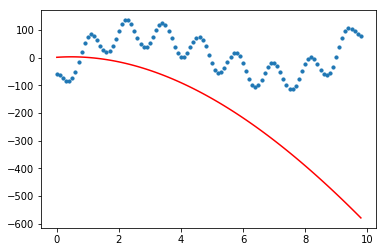

1.309058695511876e-07

In [13]:
mutationRate = 0.05
sigma =  1e-3
model = GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y)
draw(x, y, model)
model.fitness

0
5.064167578099613e-07
1
5.066747642598973e-07
2
5.072697887827888e-07
3
5.079020076352876e-07
4
5.079020076352876e-07
5
5.079020076352876e-07
6
5.079020076352876e-07
7
5.079020076352876e-07
8
5.079020076352876e-07
9
5.079020076352876e-07
10
5.079076367551694e-07
11
5.079076367551694e-07
12
5.079076367551694e-07
13
5.091680958087408e-07
14
5.091680958087408e-07
15
5.091680958087408e-07
16
5.107895841973268e-07
17
5.108732456622698e-07
18
5.108732456622698e-07
19
5.108732456622698e-07
20
5.108732456622698e-07
21
5.109954145986802e-07
22
5.109954145986802e-07
23
5.109954145986802e-07
24
5.109954145986802e-07
25
5.109954145986802e-07
26
5.114419836918917e-07
27
5.114419836918917e-07
28
5.114419836918917e-07
29
5.114419836918917e-07
30
5.114419836918917e-07
31
5.114419836918917e-07
32
5.114419836918917e-07
33
5.114419836918917e-07
34
5.11792212727177e-07
35
5.11792212727177e-07
36
5.11792212727177e-07
37
5.11792212727177e-07
38
5.117960604984291e-07
39
5.129212295371567e-07
40
5.129212295

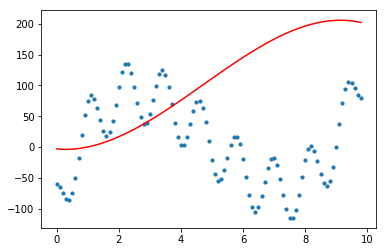

5.179963945287308e-07

In [14]:
mutationRate = 0.01
sigma =  1e-3
model = GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y)
draw(x, y, model)
model.fitness

0
3.356549390358952e-07
1
3.393109188785424e-07
2
3.4381922376258716e-07
3
3.4381922376258716e-07
4
3.4960352483218836e-07
5
3.4960352483218836e-07
6
3.503077499261798e-07
7
3.537320515088655e-07
8
3.562593900998122e-07
9
3.562593900998122e-07
10
3.564953413436234e-07
11
3.6065043599026715e-07
12
3.604526713261039e-07
13
3.604526713261039e-07
14
3.6191735771493095e-07
15
3.6191735771493095e-07
16
3.6191735771493095e-07
17
3.6191735771493095e-07
18
3.636749637762231e-07
19
3.6496019949058723e-07
20
3.6689778730498507e-07
21
3.6860437629592425e-07
22
3.683475011088253e-07
23
3.7049123519135815e-07
24
3.716290908693637e-07
25
3.741319470224163e-07
26
3.760911482434418e-07
27
3.798405279089394e-07
28
3.798405279089394e-07
29
3.798405279089394e-07
30
3.804503573839779e-07
31
3.804503573839779e-07
32
3.804503573839779e-07
33
3.832510659211817e-07
34
3.8424558706414855e-07
35
3.8536880829194963e-07
36
3.856190838312982e-07
37
3.885077315183155e-07
38
3.8958396449313814e-07
39
3.89583964493138

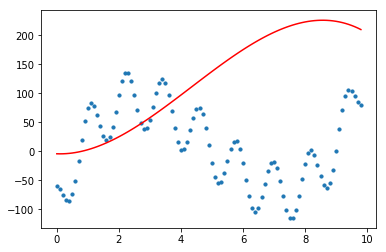

4.1233590029375987e-07

In [15]:
mutationRate = 0.1
sigma =  1e-3
model = GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y)
draw(x, y, model)
model.fitness

0
5.2087857378764894e-09
1
5.2087857378764894e-09
2
5.2208173633855266e-09
3
5.2208173633855266e-09
4
5.2208173633855266e-09
5
5.2208173633855266e-09
6
5.2208173633855266e-09
7
5.2311759578263574e-09
8
5.2311759578263574e-09
9
5.2311759578263574e-09
10
5.2311759578263574e-09
11
5.2311759578263574e-09
12
5.237314259850221e-09
13
5.440237026901612e-09
14
5.457396429961464e-09
15
5.505720310067415e-09
16
5.511230999287782e-09
17
5.511230999287782e-09
18
5.5116534035202205e-09
19
5.5116534035202205e-09
20
5.663912165136355e-09
21
5.663912165136355e-09
22
5.663912165136355e-09
23
5.663912165136355e-09
24
5.663912165136355e-09
25
5.663912165136355e-09
26
5.664303752084018e-09
27
5.665350016016667e-09
28
5.914929532972683e-09
29
5.914929532972683e-09
30
5.914929532972683e-09
31
5.914929532972683e-09
32
5.914929532972683e-09
33
6.353929882428423e-09
34
6.353929882428423e-09
35
6.353929882428423e-09
36
6.353929882428423e-09
37
6.353929882428423e-09
38
6.353929882428423e-09
39
6.353929882428423e

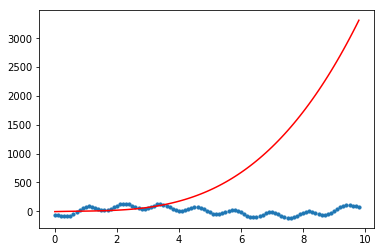

6.727168417821619e-09

In [18]:
mutationRate = 0.01
sigma =  1e-1
model = GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y)
draw(x, y, model)
model.fitness

0
5.7105675821968165e-08
1
5.7105675821968165e-08
2
5.7105675821968165e-08
3
5.7105675821968165e-08
4
5.7105675821968165e-08
5
5.7105675821968165e-08
6
2.5179709900347674e-09
7
1.7682655077429025e-08
8
1.7682655077429025e-08
9
2.6711023238750147e-08
10
2.6711023238750147e-08
11
2.6711023238750147e-08
12
2.6711023238750147e-08
13
2.6711023238750147e-08
14
2.6711023238750147e-08
15
2.6711023238750147e-08
16
2.6711023238750147e-08
17
2.6711023238750147e-08
18
2.6711023238750147e-08
19
2.6450521373668518e-08
20
2.6450521373668518e-08
21
2.6450521373668518e-08
22
2.6450521373668518e-08
23
2.6450521373668518e-08
24
3.220645564301365e-08
25
3.147458168436101e-08
26
3.147458168436101e-08
27
3.4105319537947454e-08
28
3.4105319537947454e-08
29
3.4105319537947454e-08
30
3.4105319537947454e-08
31
1.134087460344187e-07
32
1.134087460344187e-07
33
1.4343192602020293e-07
34
1.4343192602020293e-07
35
1.4343192602020293e-07
36
1.4003732503905194e-07
37
1.4003732503905194e-07
38
1.4003732503905194e-07
3

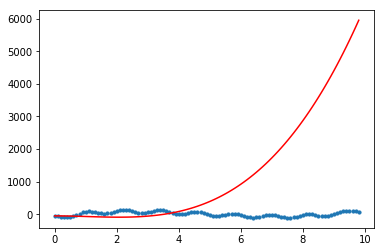

2.2914280374825256e-09

In [21]:
mutationRate = 0.05
sigma =  10
model = GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y)
draw(x, y, model)
model.fitness

0
4.7139363779637907e-08
1
4.7139363779637907e-08
2
4.708316790602552e-08
3
4.708316790602552e-08
4
6.581144102552787e-08
5
6.879439003843708e-08
6
7.020387824696375e-08
7
7.020387824696375e-08
8
8.596891443276283e-08
9
8.596891443276283e-08
10
8.596891443276283e-08
11
9.10218043577671e-08
12
9.10218043577671e-08
13
9.10218043577671e-08
14
9.10218043577671e-08
15
9.623144636667011e-08
16
9.623144636667011e-08
17
1.4987363079814974e-07
18
1.495158796828208e-07
19
1.495158796828208e-07
20
3.665394825373111e-07
21
3.663190312325717e-07
22
3.663190312325717e-07
23
3.663190312325717e-07
24
4.091486255767944e-07
25
4.142323372244402e-07
26
5.678311667659282e-07
27
5.678311667659282e-07
28
1.1516119169147e-06
29
1.9806797939235927e-06
30
1.9806797939235927e-06
31
1.9806797939235927e-06
32
1.9806797939235927e-06
33
2.1819257770878242e-06
34
2.1819257770878242e-06
35
2.1816392870277555e-06
36
2.179645308986547e-06
37
2.179645308986547e-06
38
2.179645308986547e-06
39
2.179645308986547e-06
40
2.1

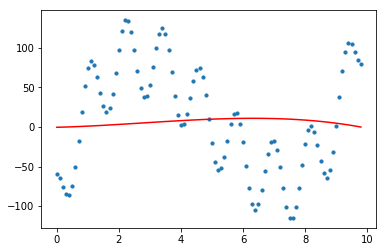

2.1799461484140252e-06

In [13]:
numberOfGenerations = 50
mutationRate = 0.05
sigma =  1e-1
model = GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y)
draw(x, y, model)
model.fitness

0
2.490131783087048e-09
1
2.490131783087048e-09
2
2.490131783087048e-09
3
2.728412973856902e-09
4
2.728412973856902e-09
5
3.0356479474586167e-09
6
3.136517489815049e-09
7
3.136517489815049e-09
8
3.821930735471758e-09
9
3.821930735471758e-09
10
4.036193223279957e-09
11
4.1104914539883675e-09
12
3.85158307030042e-09
13
3.943552008932721e-09
14
3.948088266808508e-09
15
3.94774139057538e-09
16
4.293675619871213e-09
17
4.328831176609441e-09
18
4.34730604232714e-09
19
4.393422949783993e-09
20
4.39560622650148e-09
21
5.032267932067918e-09
22
5.032267932067918e-09
23
5.032267932067918e-09
24
5.067052110424587e-09
25
5.067020530088236e-09
26
5.106736224594185e-09
27
5.105064507740209e-09
28
5.14999238300565e-09
29
5.345972682480814e-09
30
5.342176801866357e-09
31
5.4193528421526595e-09
32
7.716326906064075e-09
33
9.900167544536979e-09
34
9.900167544536979e-09
35
9.900167544536979e-09
36
9.924243739248934e-09
37
1.0830004555713125e-08
38
1.0830004555713125e-08
39
1.047213163512026e-08
40
1.04707

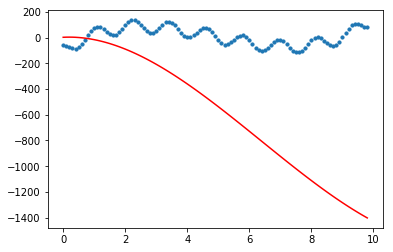

1.7893824326680598e-08

In [22]:
mutationRate = 0.1
sigma =  1e-1
model = GeneticAlgorithm(numberOfGenerations, populationSize, tornumentSize, mutationRate, sigma, x, y)
draw(x, y, model)
model.fitness

As you can see, if we increase sigma, when it become more than 1, the model's accuracy tends to decrease.
As it is for mutationRate. The best model has mutationRate = 0.1 and sigma = 0.1. Values less or more than these can worsen the model.
